In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet

In [2]:
df = pd.read_csv("TSLA.csv")

## Exploratory Data Analysis

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-22,68.225998,68.447998,67.473999,68.269997,68.269997,21610000
1,2017-08-23,67.797997,70.697998,67.660004,70.554001,70.554001,24772500
2,2017-08-24,70.503998,71.332001,69.947998,70.585999,70.585999,22923500
3,2017-08-25,70.848000,71.138000,69.459999,69.610001,69.610001,17420000
4,2017-08-28,69.456001,69.470001,67.944000,69.132004,69.132004,18820000
...,...,...,...,...,...,...,...
1253,2022-08-15,905.359985,939.400024,903.690002,927.960022,927.960022,29786400
1254,2022-08-16,935.000000,944.000000,908.650024,919.690002,919.690002,29378800
1255,2022-08-17,910.190002,928.969971,900.099976,911.989990,911.989990,22922000
1256,2022-08-18,918.000000,919.500000,905.559998,908.609985,908.609985,15833500


In [4]:
df.shape

(1258, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,352.210453,360.400144,343.348864,352.114619,352.114619,4.407131e+07
std,352.336686,360.508278,343.128703,351.902473,351.902473,3.005756e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,62.417502,63.375000,61.030999,62.336499,62.336499,2.521425e+07
50%,113.911998,115.881001,110.986000,113.171997,113.171997,3.402100e+07
75%,684.635025,700.525009,669.262482,686.052490,686.052490,5.096075e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Time Series Analysis

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

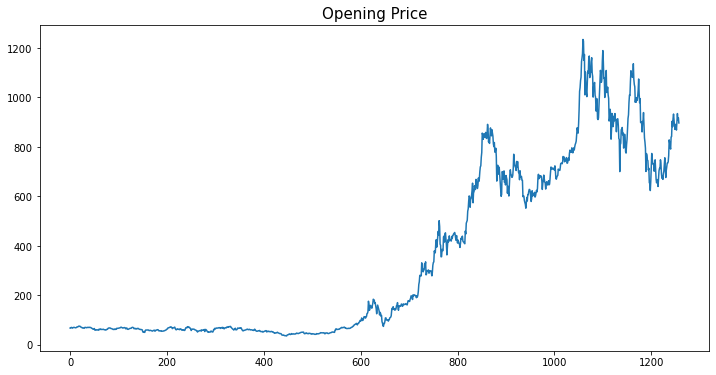

In [10]:
plt.figure(figsize=(12, 6))
df["Open"].plot()
plt.title("Opening Price", size=15)
plt.show()

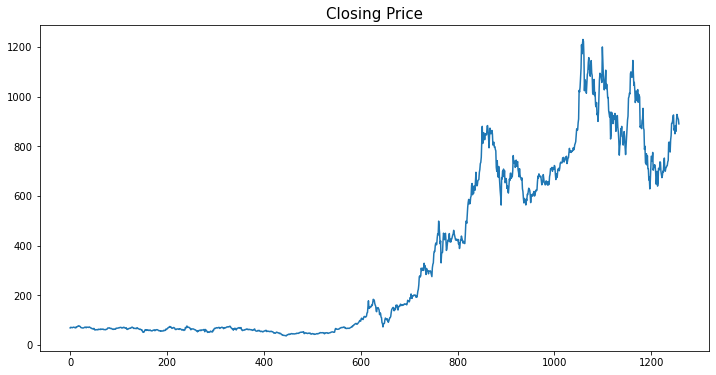

In [11]:
plt.figure(figsize=(12, 6))
df["Close"].plot()
plt.title("Closing Price", size=15)
plt.show()

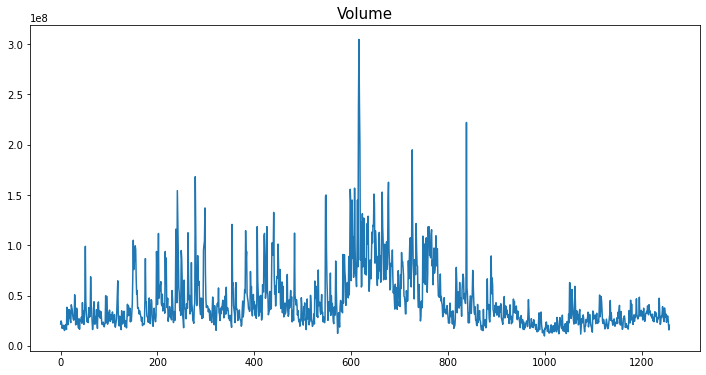

In [12]:
plt.figure(figsize=(12, 6))
df["Volume"].plot()
plt.title("Volume", size=15)
plt.show()

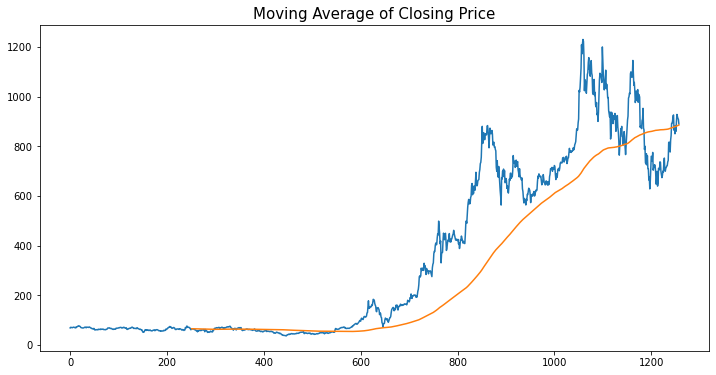

In [13]:
plt.figure(figsize=(12, 6))
df["Close"].plot()
df["Close"].rolling(window=252).mean().plot()
plt.title("Moving Average of Closing Price", size=15)
plt.show()

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-22,68.225998,68.447998,67.473999,68.269997,68.269997,21610000
1,2017-08-23,67.797997,70.697998,67.660004,70.554001,70.554001,24772500
2,2017-08-24,70.503998,71.332001,69.947998,70.585999,70.585999,22923500
3,2017-08-25,70.848000,71.138000,69.459999,69.610001,69.610001,17420000
4,2017-08-28,69.456001,69.470001,67.944000,69.132004,69.132004,18820000


In [15]:
df.drop(["Open","High","Low","Adj Close","Volume"], axis=1, inplace=True)

In [16]:
df.head()

,Date,Close
0,2017-08-22,68.269997
1,2017-08-23,70.554001
2,2017-08-24,70.585999
3,2017-08-25,69.610001
4,2017-08-28,69.132004


In [17]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [18]:
df.columns=["ds","y"]

In [19]:
df.head()

,ds,y
0,2017-08-22,68.269997
1,2017-08-23,70.554001
2,2017-08-24,70.585999
3,2017-08-25,69.610001
4,2017-08-28,69.132004


## Model Building

In [20]:
m = Prophet(interval_width= 0.95, daily_seasonality= True)
model = m.fit(df)

14:09:23 - cmdstanpy - INFO - Chain [1] start processing
14:09:23 - cmdstanpy - INFO - Chain [1] done processing


## Predict

In [21]:
future = m.make_future_dataframe(periods=100, freq="D")
forecast = m.predict(future)


In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1353,2022-11-23,957.540703,855.610323,1144.462305,933.984717,985.335546,33.183812,33.183812,33.183812,-23.248793,...,-0.323040,-0.323040,-0.323040,56.755645,56.755645,56.755645,0.0,0.0,0.0,990.724515
1354,2022-11-24,957.763575,848.919018,1132.339400,933.899400,985.824014,32.221290,32.221290,32.221290,-23.248793,...,-2.315823,-2.315823,-2.315823,57.785906,57.785906,57.785906,0.0,0.0,0.0,989.984865
1355,2022-11-25,957.986447,842.291451,1132.305217,933.829327,986.304500,32.035596,32.035596,32.035596,-23.248793,...,-3.443386,-3.443386,-3.443386,58.727774,58.727774,58.727774,0.0,0.0,0.0,990.022043
1356,2022-11-26,958.209319,850.050860,1136.524122,933.759255,986.778631,39.211654,39.211654,39.211654,-23.248793,...,2.906097,2.906097,2.906097,59.554349,59.554349,59.554349,0.0,0.0,0.0,997.420973
1357,2022-11-27,958.432191,860.541155,1135.653542,933.644211,987.252763,39.898282,39.898282,39.898282,-23.248793,...,2.906096,2.906096,2.906096,60.240978,60.240978,60.240978,0.0,0.0,0.0,998.330473


In [23]:
df.tail()

,ds,y
1253,2022-08-15,927.960022
1254,2022-08-16,919.690002
1255,2022-08-17,911.989990
1256,2022-08-18,908.609985
1257,2022-08-19,890.000000


## Visualization

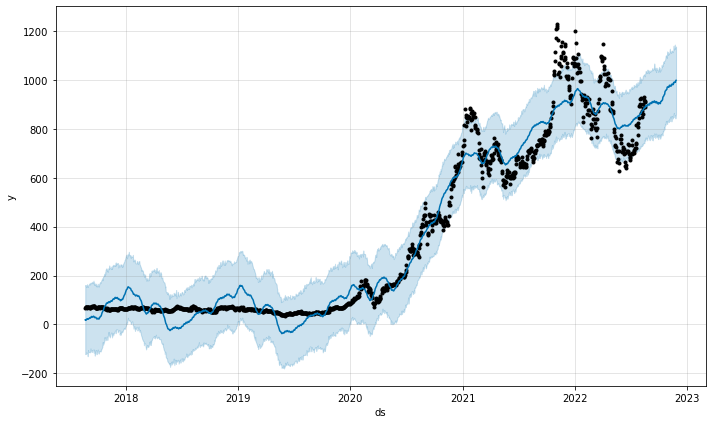

In [24]:
m_plot = m.plot(forecast)

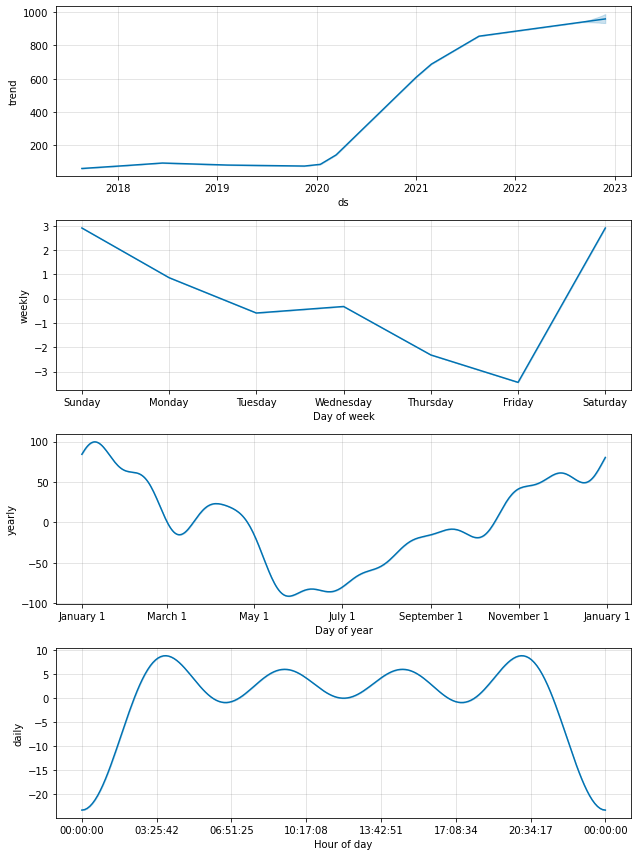

In [25]:
m_plot2 = m.plot_components(forecast)